In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(['Cabin','Embarked','Age'],axis=1,inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [14]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int16
Sex               int8
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
dtype: object

# MACHINE LEARNING MODELS

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [17]:
x = df.drop('Survived',axis=1)
y = df['Survived']
print(x.shape)
print(y.shape)

(891, 8)
(891,)


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


# Decision tree classifier

In [19]:
DT = DecisionTreeClassifier()
DT = DecisionTreeClassifier(max_depth=4)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
DT.score(x_test,y_test)
print("accuracy:",round(DT.score(x_test,y_test)*100),"%")

accuracy: 81 %


# Random forest

In [20]:
RF = RandomForestClassifier(n_estimators=180)
RF.fit(x_train, y_train)
RF.score(x_test,y_test)
print("accuracy:",round(RF.score(x_test,y_test)*100),"%")

accuracy: 82 %


# Logistic regression

In [21]:
Log_R = LogisticRegression(max_iter=10000,C=10)
Log_R.fit(x_train,y_train)
Log_R.score(x_test,y_test)
print("accuracy:",round(Log_R.score(x_test,y_test)*100),"%")

accuracy: 79 %


# KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)
print("accuracy:",round(knn.score(x_test,y_test)*100),"%")

accuracy: 69 %


# SVC

In [23]:
svc = SVC(C=1)
svc.fit(x_train, y_train)
svc.score(x_test,y_test)
print("accuracy:",round(svc.score(x_test,y_test)*100),"%")

accuracy: 67 %


# Naive Baiyes

In [24]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
NB.score(x_test,y_test)
print("accuracy:",round(NB.score(x_test,y_test)*100),"%")

accuracy: 79 %


# Gradient Booster

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 42)
GB.fit(x_train, y_train)
GB.score(x_test,y_test)
print("accuracy:",round(GB.score(x_test,y_test)*100),"%")
  

accuracy: 39 %


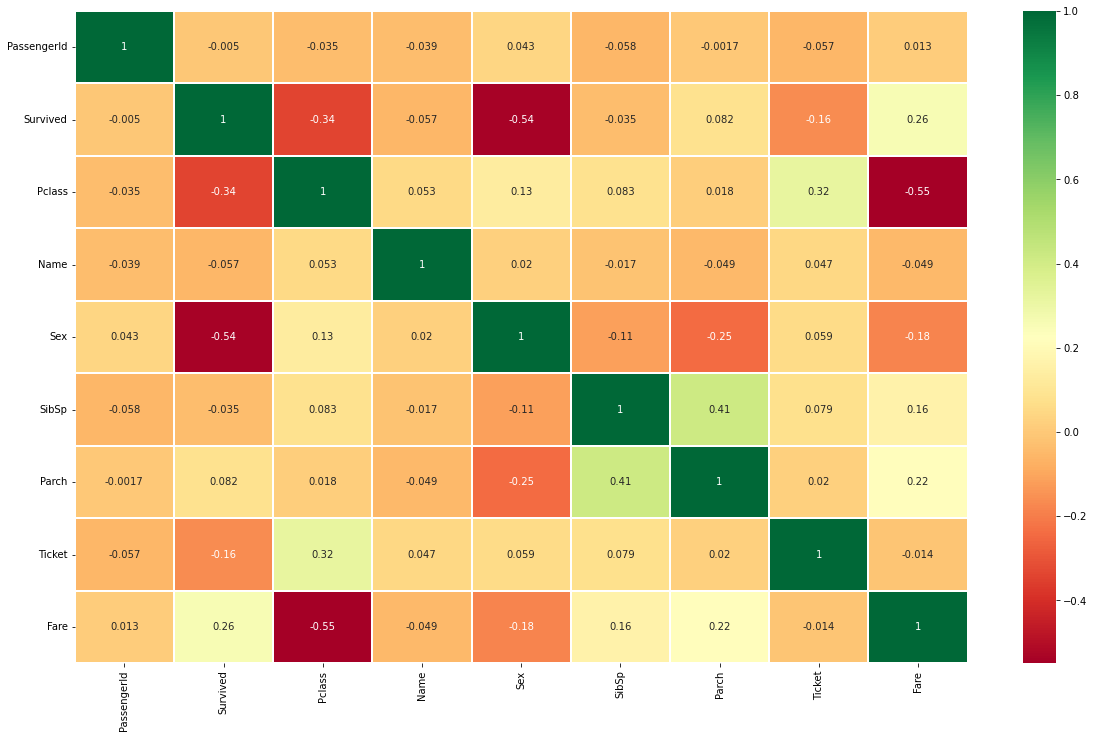

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

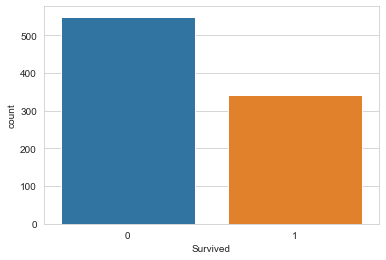

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

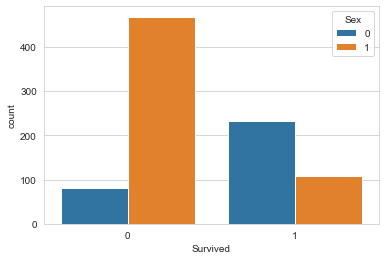

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)